In [55]:
import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms
import pandahouse as ph
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
import plotly.express as px
import numpy as np
from scipy.stats import iqr


In [ ]:
a = range(100)

# первый способ
st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))

# второй способ
sms.DescrStatsW(a).tconfint_mean()

In [2]:
sd = 4

In [3]:
n = 64

In [4]:
x = 18.5

In [16]:
z = 1.96

In [15]:
se = sd / n**0.5
se

0.5

In [17]:
a = x + (z*se)
a

10.98

In [18]:
b = x - (z*se)
b

9.02

In [ ]:
Z = 

In [27]:
se = 9/144**0.5
se

0.75

In [30]:
z = (118-115)/0.75
z

4.0

In [59]:
df = pd.read_csv('london.csv', parse_dates=['timestamp'])

In [51]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0


In [52]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [53]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object

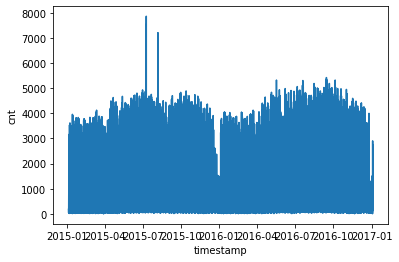

In [56]:
sns.lineplot(data=df, x='timestamp', y='cnt')

In [61]:
df = df.sort_values('timestamp').set_index('timestamp')

KeyError: "None of ['timestamp'] are in the columns"

In [96]:
df.head(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [123]:
df1 = df.resample(rule='D').cnt.sum()
df1

timestamp
2015-01-04     9234
2015-01-05    20372
2015-01-06    20613
2015-01-07    21064
2015-01-08    15601
              ...  
2016-12-30    11566
2016-12-31    11424
2017-01-01     6421
2017-01-02    11823
2017-01-03    19436
Freq: D, Name: cnt, Length: 731, dtype: int64

In [124]:
df2 = df1.rolling(window=3).mean().reset_index()

In [125]:
df1 = df1.reset_index()

In [126]:
df1['cnts'] = df2['cnt']

In [135]:
c = df1['cnt'] - df1['cnts']

In [136]:
std = np.std(c)

In [142]:
std

4558.58664111794

In [143]:
df1['upper_bound'] = df1['cnts'] + 2.576 * std

In [144]:
df1['lower_bound'] = df1['cnts'] - 2.576 * std

In [150]:
df1

,timestamp,cnt,cnts,upper_bound,lower_bound
0,2015-01-04,9234,NaN,NaN,NaN
1,2015-01-05,20372,NaN,NaN,NaN
2,2015-01-06,20613,16739.666667,28482.585854,4996.747479
3,2015-01-07,21064,20683.000000,32425.919188,8940.080812
4,2015-01-08,15601,19092.666667,30835.585854,7349.747479
...,...,...,...,...,...
726,2016-12-30,11566,12682.000000,24424.919188,939.080812
727,2016-12-31,11424,12347.333333,24090.252521,604.414146
728,2017-01-01,6421,9803.666667,21546.585854,-1939.252521
729,2017-01-02,11823,9889.333333,21632.252521,-1853.585854


In [149]:
df1 = df1.drop(columns = 'low')

In [152]:
df1.query('cnt < lower_bound')

,timestamp,cnt,cnts,upper_bound,lower_bound
130,2015-05-14,15609,28709.333333,40452.252521,16966.414146
189,2015-07-12,23240,36036.666667,47779.585854,24293.747479
201,2015-07-24,16034,31013.666667,42756.585854,19270.747479
232,2015-08-24,17400,29529.333333,41272.252521,17786.414146
314,2015-11-14,8898,21037.333333,32780.252521,9294.414146
607,2016-09-02,0,26086.333333,37829.252521,14343.414146
615,2016-09-10,17080,31262.000000,43004.919188,19519.080812
621,2016-09-16,21967,36193.333333,47936.252521,24450.414146
678,2016-11-12,8990,20878.000000,32620.919188,9135.080812
